In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from imblearn.over_sampling import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans

/opt/miniconda3/envs/ML/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Analysis of Credit Card fraud dataset

This dataset is  an interesting trainning dataset to understand the concept of imbalanced dataset.

## A look at the data

The number of entries is quite important which will help us having relevant results. <br>
V1 to V28 are variables comming from a PCA technique to anonymize the data. 

In [2]:
data = pd.read_csv('creditcard.csv')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


The main difficulty of this dataset is in theextremely underepresented fraud label. <br>
Which is an often encountered issue wthin real dataset for detection.

<AxesSubplot:>

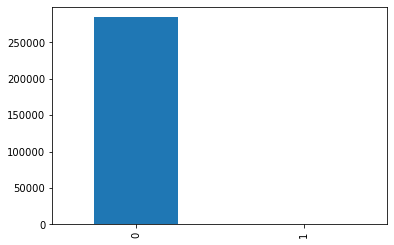

In [3]:
data['Class'].value_counts().plot(kind='bar')

To resolve the issue we use the SMOTE technique which is often better than simply randomly oversample

In [4]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

sampler = SMOTE()

X_res, y_res =sampler.fit_resample(X, y)

scaler = MinMaxScaler()

X_res = scaler.fit_transform(X_res)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

## XGBoost

Here we use XGBoost to have a quick and precise ML algo working on the dataset

In [5]:
model = xgb.XGBClassifier(use_label_encoder=False)

model.fit(X_train, y_train, verbose=1)

[10:16:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [6]:
predictions =  model.predict(X_test) > 0.5

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93775
           1       1.00      1.00      1.00     93873

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



In [7]:
# feature importance
feautre_imp=pd.DataFrame(model.feature_importances_, columns=['features_importance'])
# plot
feautre_imp.sort_values(by=['features_importance'],ascending=False).head()

,features_importance
14,0.676083
4,0.056987
12,0.040924
17,0.029457
3,0.015809


## Unsupervised learning to cluster

In [8]:
wcss = []

for i in range(1,11):
    model = MiniBatchKMeans(n_clusters=i, init="k-means++")
    model.fit(X)
    wcss.append(model.inertia_)


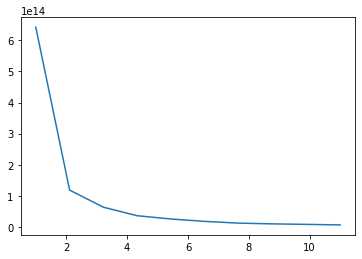

In [9]:
space_x = np.linspace(1,11,10)
plt.plot(space_x, wcss)

In [10]:
kmeans = MiniBatchKMeans(n_clusters=2, verbose=1, random_state=42)
labels = kmeans.fit_predict(X_test)

Init 1/3 with method k-means++
Inertia for init 1/3: 833.4183681637619
Init 2/3 with method k-means++
Inertia for init 2/3: 789.9853624488394
Init 3/3 with method k-means++
Inertia for init 3/3: 1019.5250327079326
Minibatch step 1/18325: mean batch inertia: 0.2577726213027066
Minibatch step 2/18325: mean batch inertia: 0.1844754597921624, ewa inertia: 0.1844754597921624
Minibatch step 3/18325: mean batch inertia: 0.1864193021807855, ewa inertia: 0.18449667487570615
Minibatch step 4/18325: mean batch inertia: 0.18486293220012134, ewa inertia: 0.18450067220582994
Minibatch step 5/18325: mean batch inertia: 0.18134400306735438, ewa inertia: 0.18446622033880372
Minibatch step 6/18325: mean batch inertia: 0.18363385787462927, ewa inertia: 0.1844571359401305
Minibatch step 7/18325: mean batch inertia: 0.18524115215418666, ewa inertia: 0.18446569268813548
Minibatch step 8/18325: mean batch inertia: 0.1846053017564604, ewa inertia: 0.1844672163806248
Minibatch step 9/18325: mean batch inertia:

In [11]:
label_df = pd.DataFrame(X_test, columns=data.columns[:-1])
label_df['label'] = labels

In [12]:
label_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,label
0,0.900732,0.928708,0.812489,0.720223,0.480990,0.769914,0.232421,0.251818,0.796866,0.320127,...,0.571771,0.492209,0.660700,0.299553,0.582367,0.455034,0.427490,0.319285,0.000801,0
1,0.002388,0.919012,0.787851,0.809553,0.429032,0.762198,0.248700,0.249929,0.800282,0.367499,...,0.569796,0.508327,0.658540,0.425290,0.580387,0.454303,0.421324,0.310216,0.000015,0
2,0.024694,0.943819,0.777130,0.875331,0.283372,0.766921,0.259508,0.270580,0.780920,0.499515,...,0.554854,0.491149,0.663995,0.436737,0.599090,0.481668,0.416505,0.310585,0.001188,0
3,0.637306,0.985651,0.775262,0.826215,0.420253,0.766844,0.261546,0.263585,0.785218,0.476997,...,0.559843,0.503041,0.668715,0.352395,0.569471,0.411752,0.416147,0.311991,0.000267,0
4,0.238377,0.828870,0.825885,0.654881,0.556490,0.714224,0.229461,0.195117,0.838501,0.242018,...,0.596592,0.504630,0.666863,0.446966,0.595364,0.480361,0.436005,0.314219,0.002053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187643,0.343947,0.836340,0.700739,0.802844,0.405096,0.793168,0.215788,0.226151,0.803031,0.438687,...,0.579874,0.483234,0.659609,0.369169,0.588859,0.484022,0.431756,0.292977,0.000687,0
187644,0.355923,0.897883,0.780599,0.791798,0.366283,0.753201,0.258598,0.247943,0.789478,0.452200,...,0.568924,0.536489,0.669797,0.329387,0.558527,0.537670,0.393100,0.328861,0.002706,1
187645,0.267607,0.939018,0.784489,0.821041,0.302870,0.765094,0.251801,0.257791,0.791400,0.411025,...,0.568504,0.511111,0.661377,0.345678,0.596876,0.356717,0.424547,0.317866,0.000039,0
187646,0.846589,0.956798,0.802355,0.725361,0.461124,0.759995,0.235686,0.252261,0.794987,0.372695,...,0.570556,0.505790,0.667397,0.363892,0.561585,0.512940,0.422115,0.313804,0.002356,0


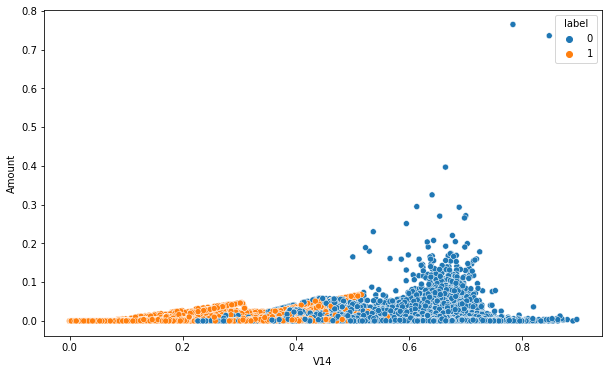

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=label_df['V14'],y=label_df['Amount'], hue='label', data=label_df)
plt.show()

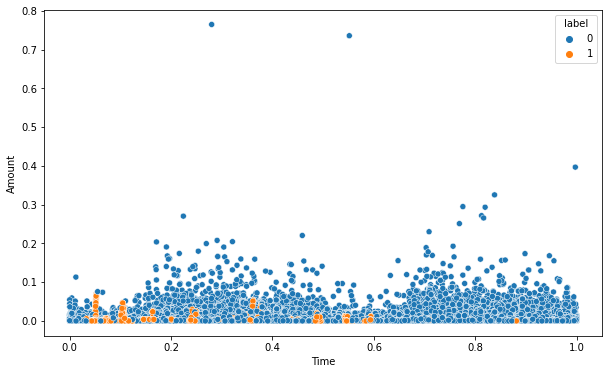

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=label_df['Time'],y=label_df['Amount'], hue='label', data=label_df)
plt.show()

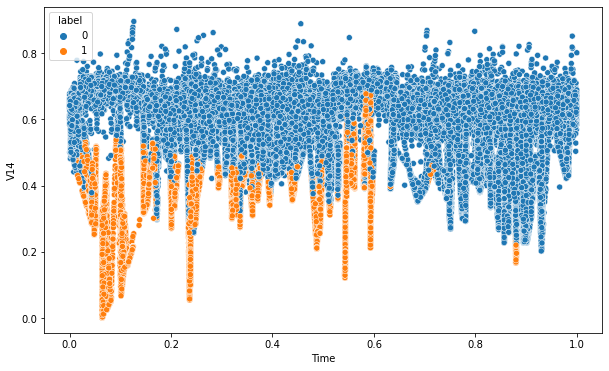

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=label_df['Time'],y=label_df['V14'], hue='label', data=label_df)
plt.show()

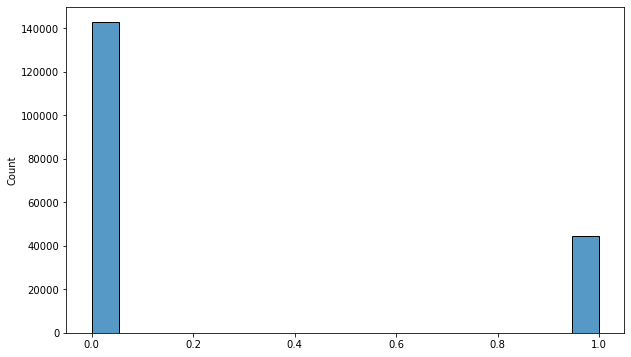

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(x=labels)
plt.show()

In [17]:
print(classification_report(y_test,labels))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79     93775
           1       1.00      0.48      0.65     93873

    accuracy                           0.74    187648
   macro avg       0.83      0.74      0.72    187648
weighted avg       0.83      0.74      0.72    187648



## Conclusion

XGBoost:<br>
It works pretty well with a precision of 1 and a F1 score of 1. <br>
We have to be careful on that result, a good continuation would be a test on another real dataset of the same kind keeping this already trained model.<br>
<br>
K-means:<br>
accuracy of 0.74 but a F1-score of 0.65
<br>
<br>
XGboost is a good tool for precision, a good thing is to print out the decision tree to get an understanding of what's happening.

### Bonus k-mean num_clusters=3
Just for the art

In [18]:
kmeans = MiniBatchKMeans(n_clusters=3, verbose=0, random_state=42)
labels = kmeans.fit_predict(X_test)
label_df = pd.DataFrame(X_test, columns=data.columns[:-1])
label_df['label'] = labels

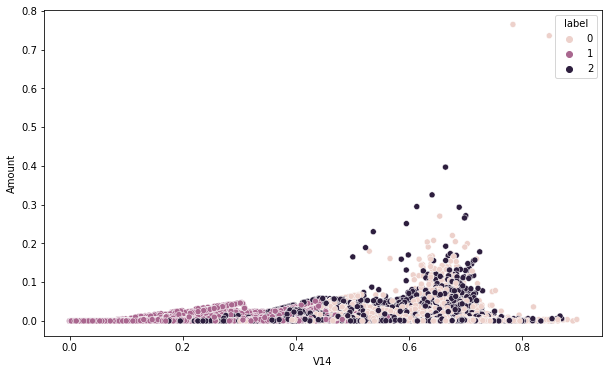

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=label_df['V14'],y=label_df['Amount'], hue='label', data=label_df)
plt.show()

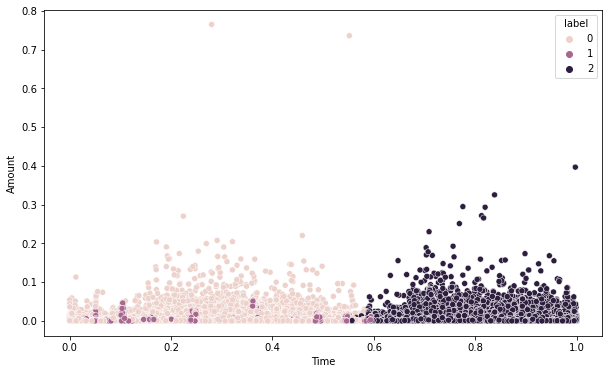

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=label_df['Time'],y=label_df['Amount'], hue='label', data=label_df)
plt.show()

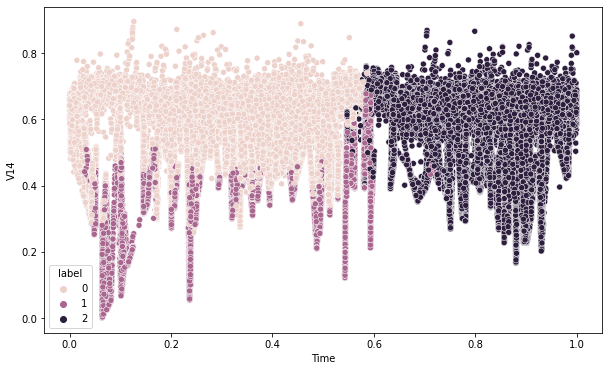

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=label_df['Time'],y=label_df['V14'], hue='label', data=label_df)
plt.show()